# Regression for Car Mileage
In this project, we aim to develop a predictive model to estimate car mileage based on various features of the vehicle. Using regression analysis, we will explore the relationships between mileage and factors such as age, engine size, horsepower, and other relevant attributes.

## Objectives:
- Data Exploration: Analyze and preprocess the dataset to understand the distribution of features and identify any missing or outlier values.
- Feature Engineering: Select and transform features that are most predictive of car mileage.
- Model Development: Apply different regression techniques (e.g., Linear Regression, Ridge Regression, Lasso Regression) to build models that predict mileage.
- Model Evaluation: Evaluate the performance of the models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
- Insights and Recommendations: Interpret the results to provide insights on which factors most significantly impact car mileage and offer recommendations for improvements.

By the end of this project, we aim to deliver a robust regression model capable of predicting car mileage with high accuracy, and generate actionable insights based on the analysis.

# Data
Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [3]:
!pip install ucimlrepo

# Data Overview and Cleaning
## Load Data

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

# Data Exploration and Preprocessing

In [5]:
data = pd.concat([X,y], axis=1)
data.sample(5)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
250,318.0,8,140.0,3735,13.2,78,1,19.4
141,98.0,4,83.0,2219,16.5,74,2,29.0
339,151.0,4,84.0,2635,16.4,81,1,26.6
138,318.0,8,150.0,4457,13.5,74,1,14.0
359,141.0,4,80.0,3230,20.4,81,2,28.1


In [6]:
#Generate summary statistics for each column to understand the data distribution.µ
data.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [7]:
#Check for Missing Values
print("shape of data", data.shape)
print(data.isnull().sum())

shape of data (398, 8)
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [8]:
df_missing = data[data['horsepower'].isna()]
df = data.dropna(subset=['horsepower'])

In [9]:
print(df.isnull().sum())

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


# Exploratory Data Analysis (EDA)
- Histograms: Plot histograms for each numerical feature to understand their distributions.
- Box Plots: Use box plots to identify outliers and understand the spread of the data.
- Correlation Matrix: Compute and visualize the correlation matrix to identify relationships between variables.
- Pair Plot: Create pair plots to visualize relationships between all pairs of variables.

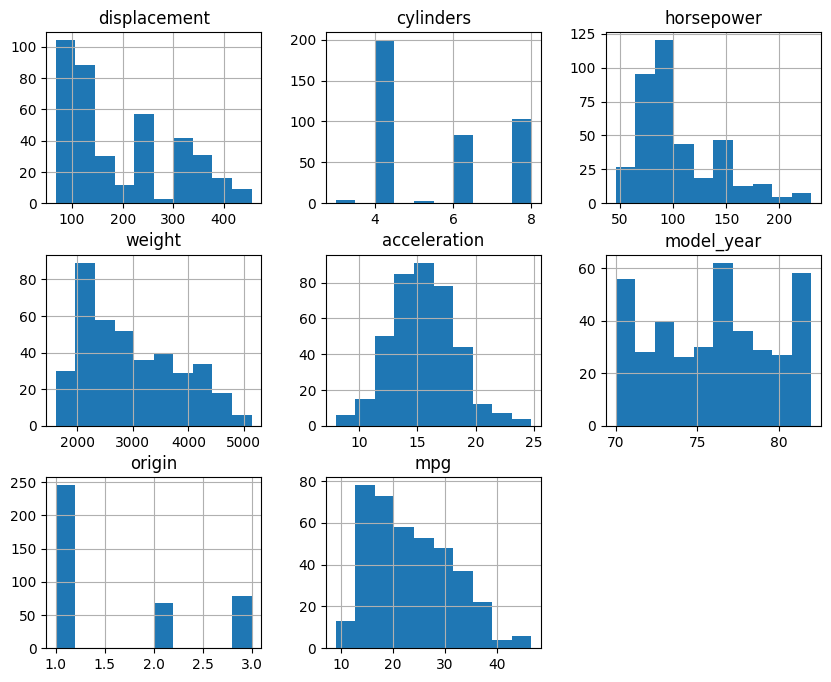

In [10]:
# Histograms
df.hist(figsize=(10, 8))
plt.show()

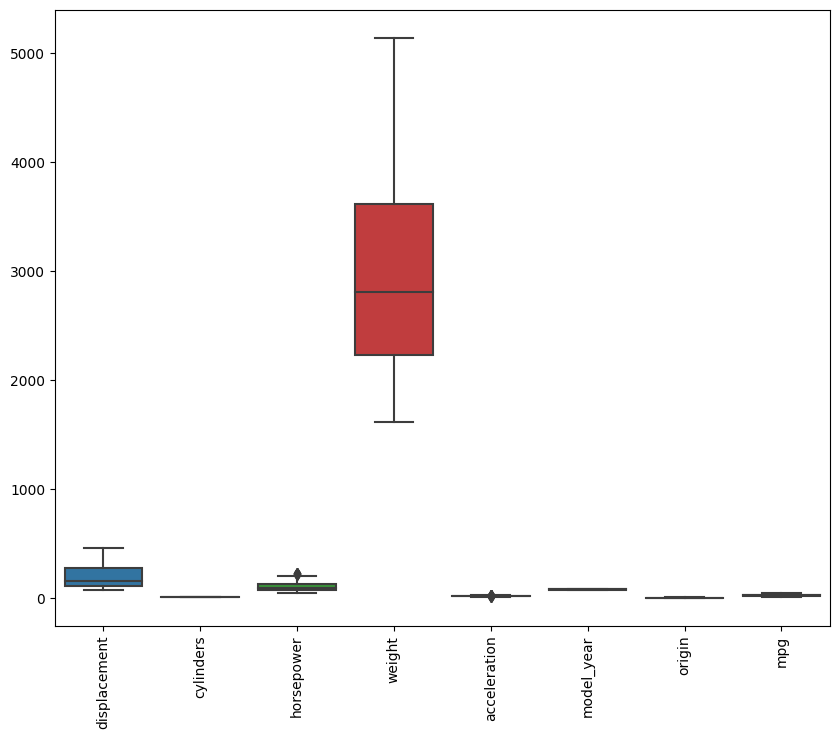

In [11]:
# Box Plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

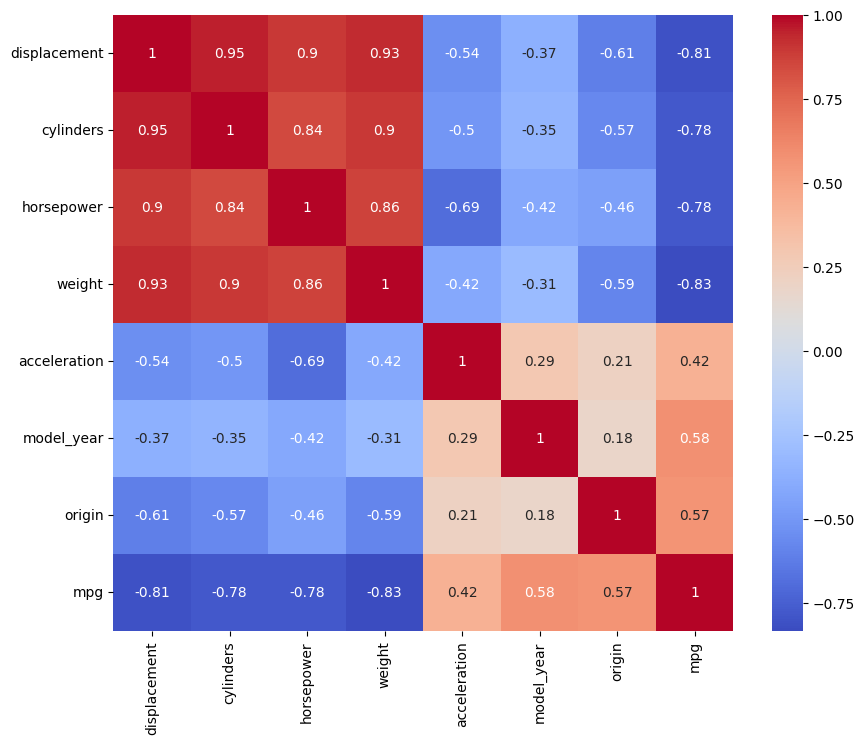

In [12]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

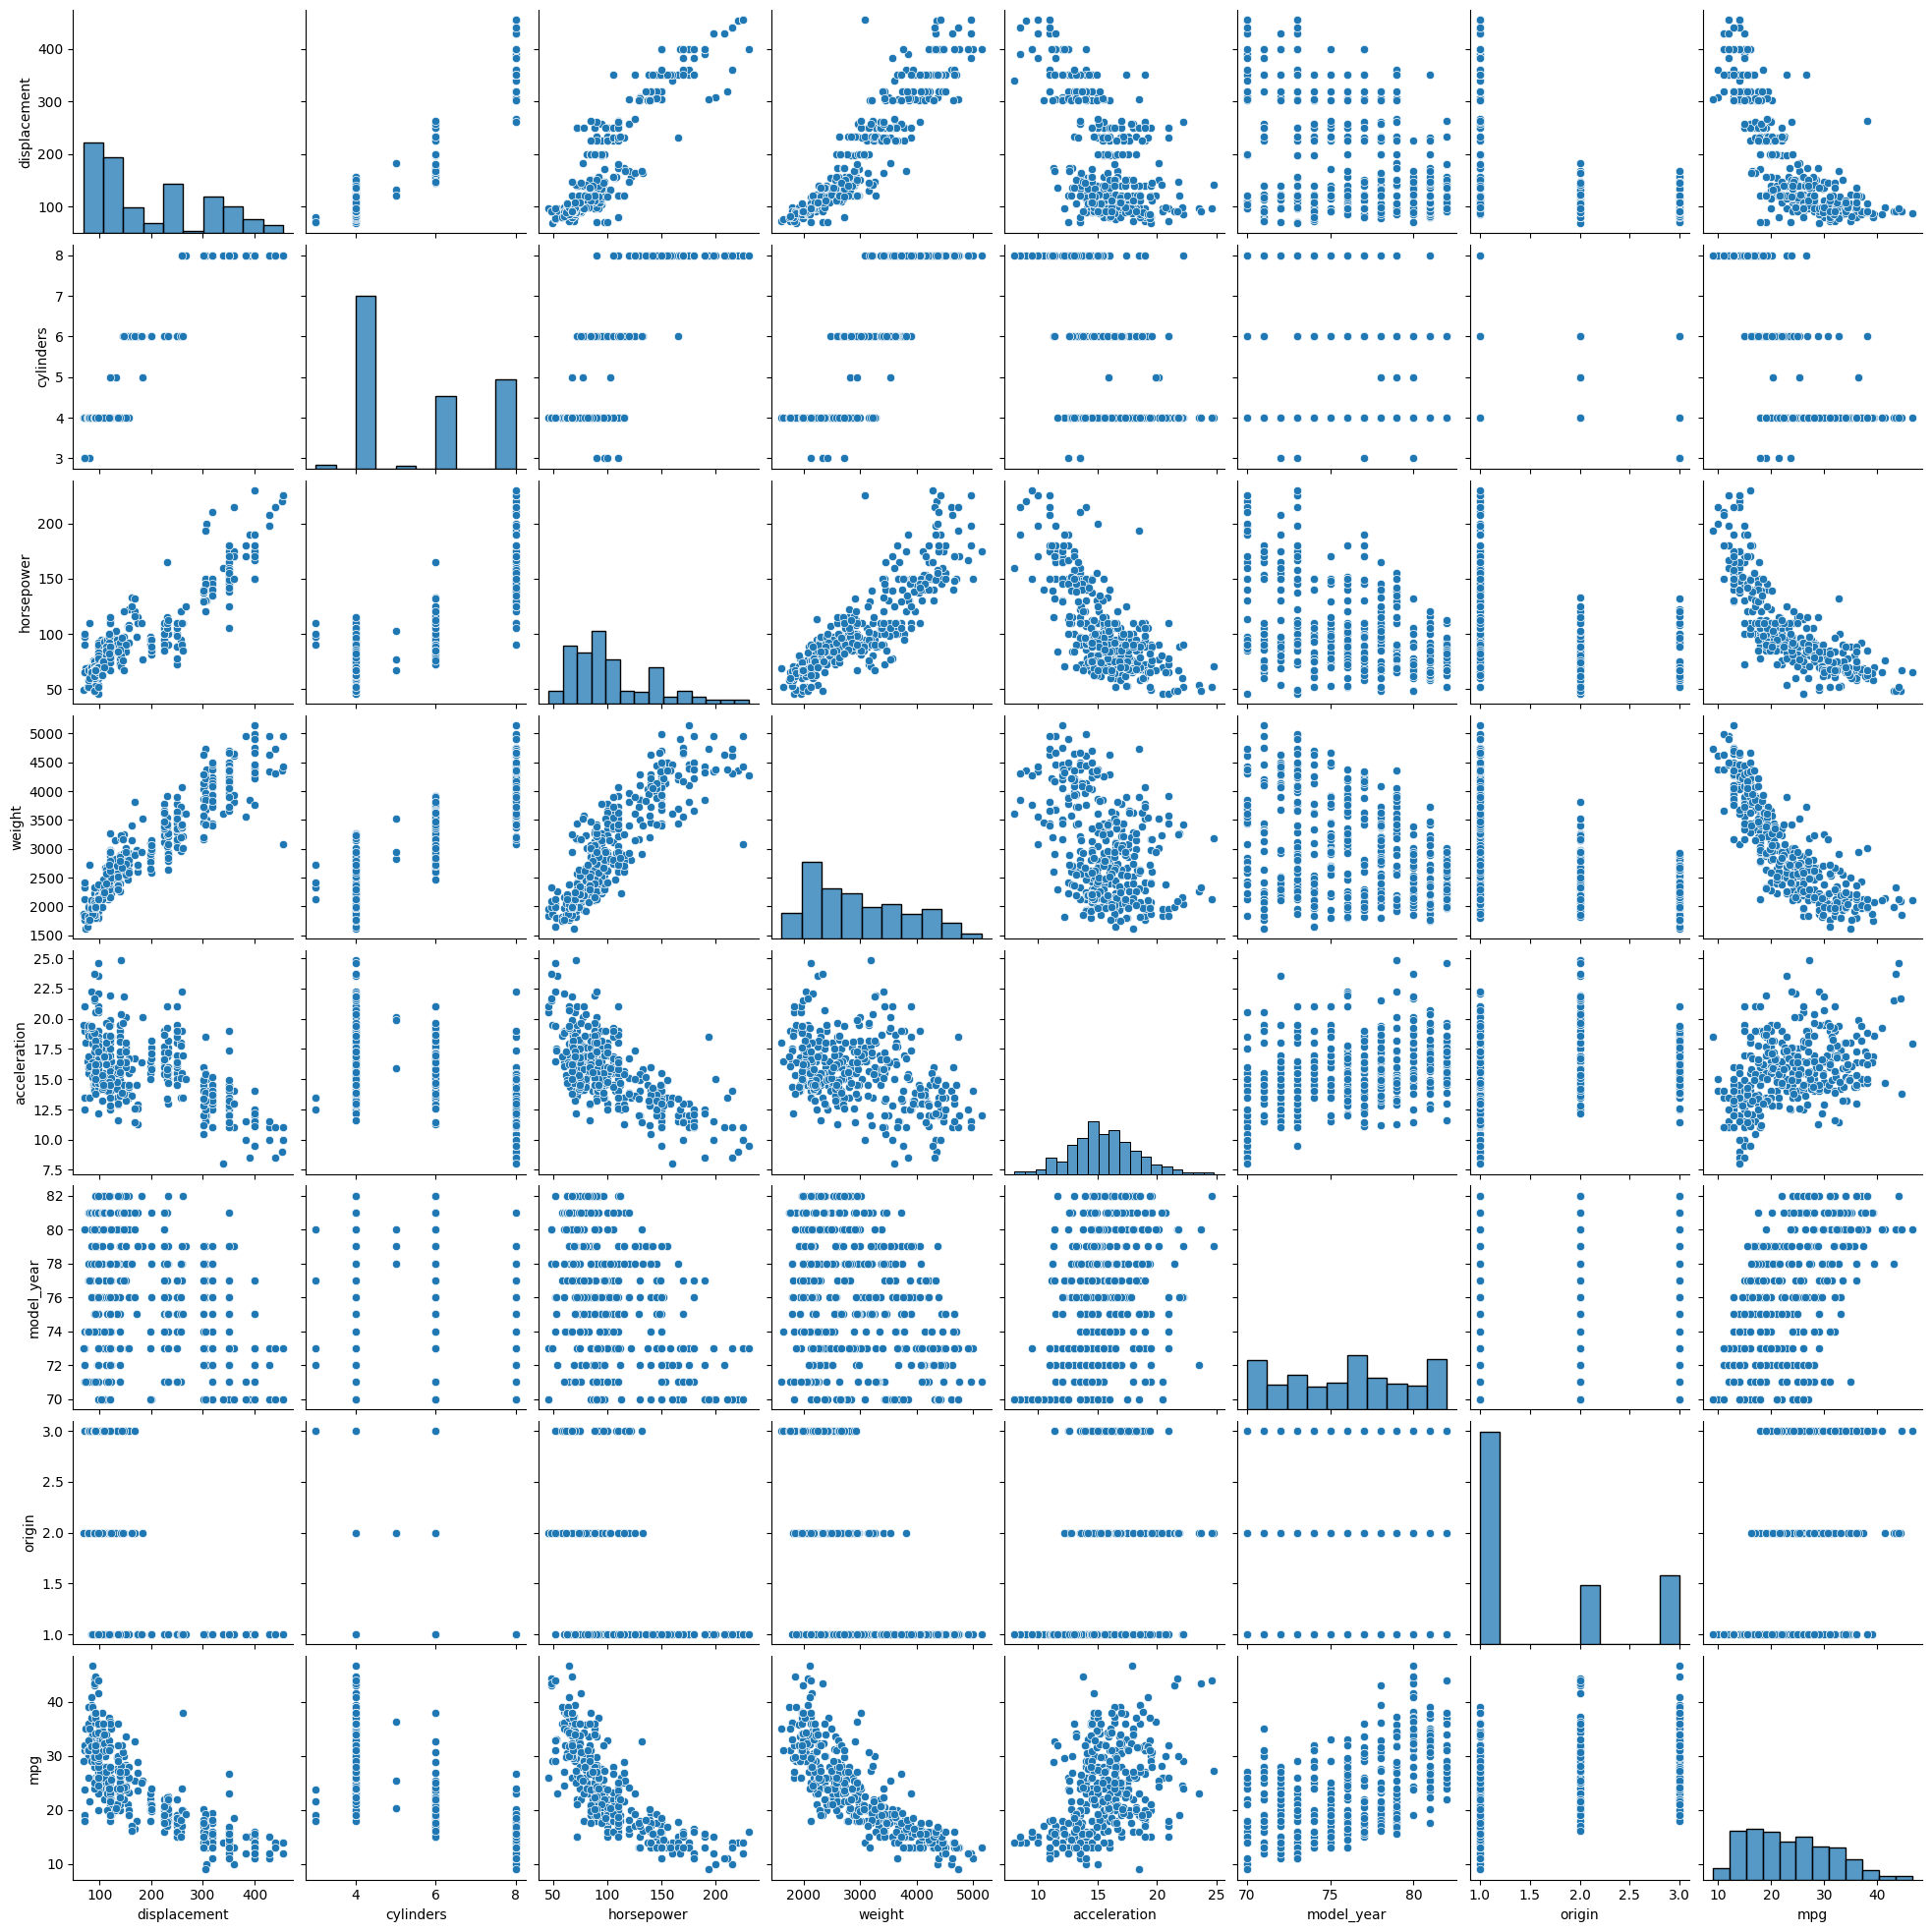

In [13]:
# Pair Plot
sns.pairplot(df)
plt.show()

<Axes: xlabel='horsepower', ylabel='mpg'>

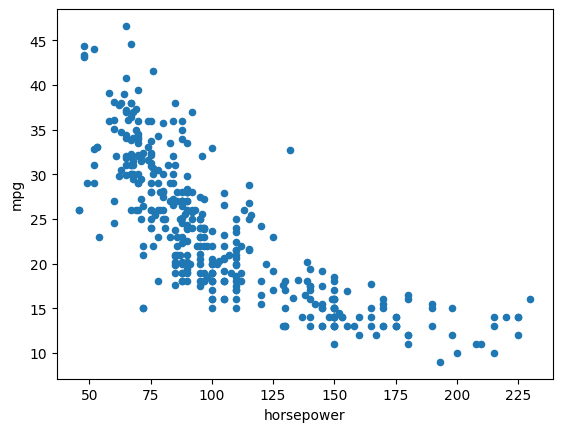

In [14]:
df.plot.scatter(x = "horsepower", y = "mpg")

# Feature Analysis

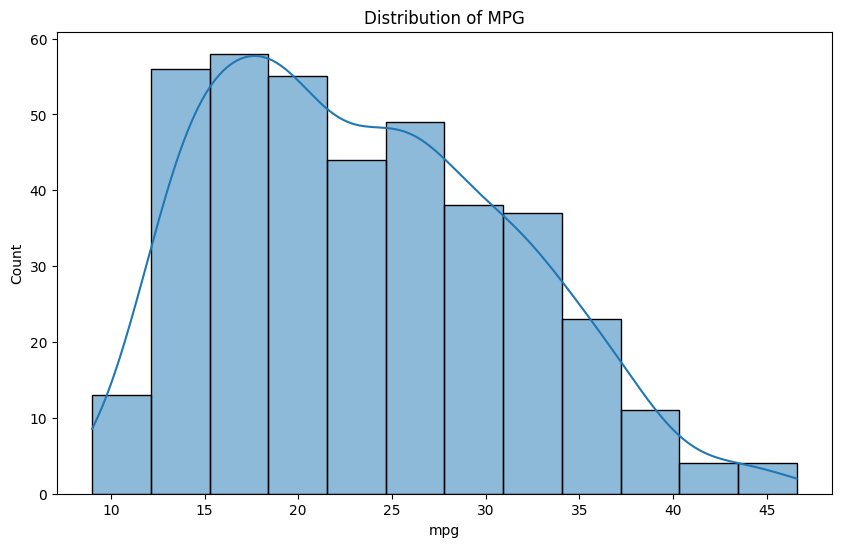

In [15]:
# Distribution of Target Variable (mpg)
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.show()

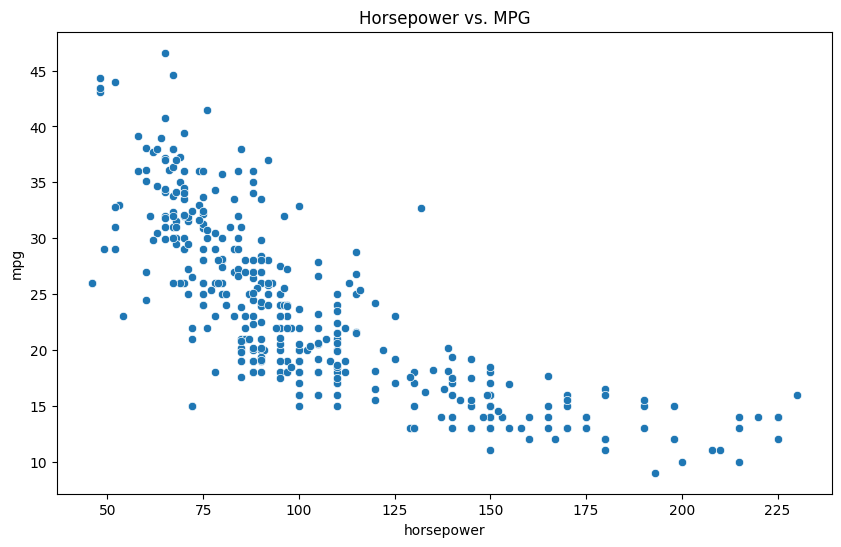

In [16]:
# Horsepower vs. MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Horsepower vs. MPG')
plt.show()


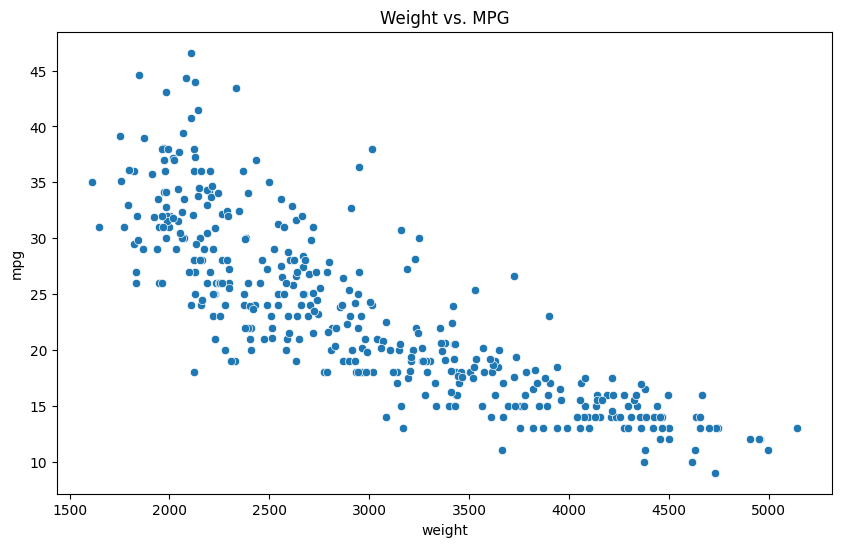

In [17]:
# Weight vs. MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('Weight vs. MPG')
plt.show()

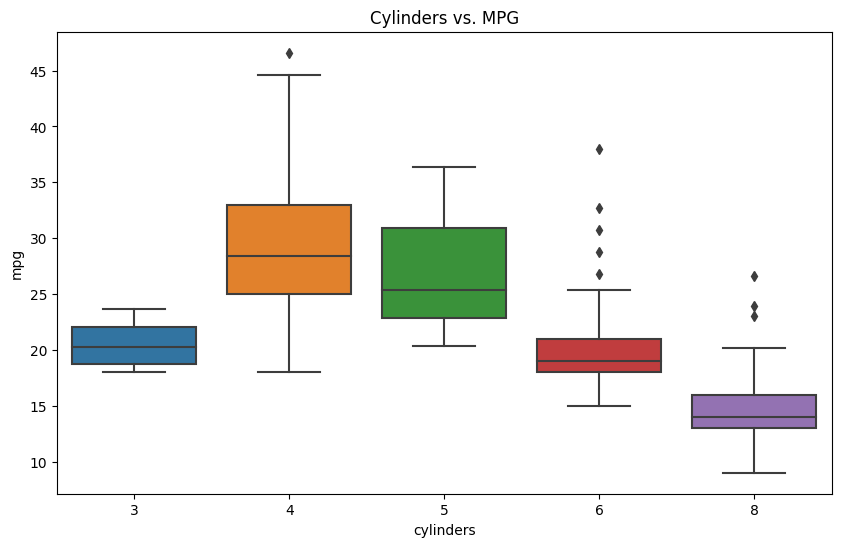

In [18]:
# Cylinder Count Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('Cylinders vs. MPG')
plt.show()

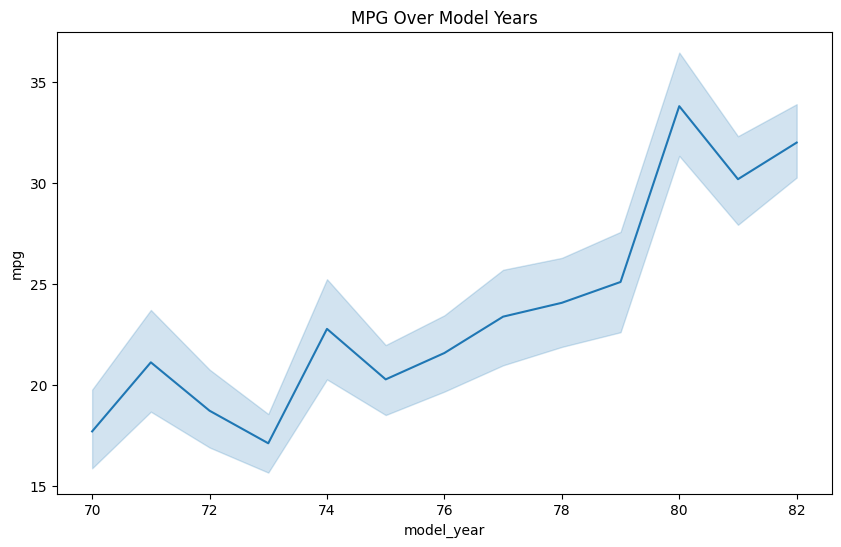

In [19]:
# Time Series Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_year', y='mpg', data=df)
plt.title('MPG Over Model Years')
plt.show()

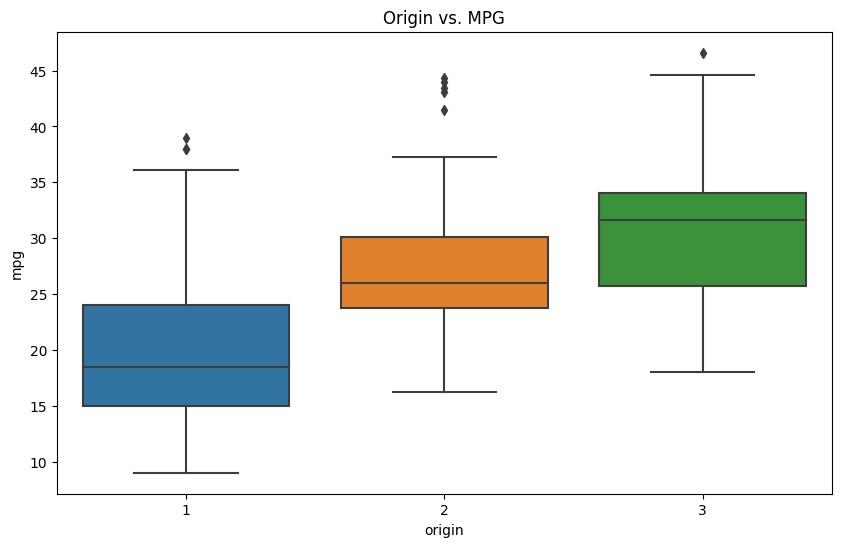

In [20]:
# Origin Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Origin vs. MPG')
plt.show()

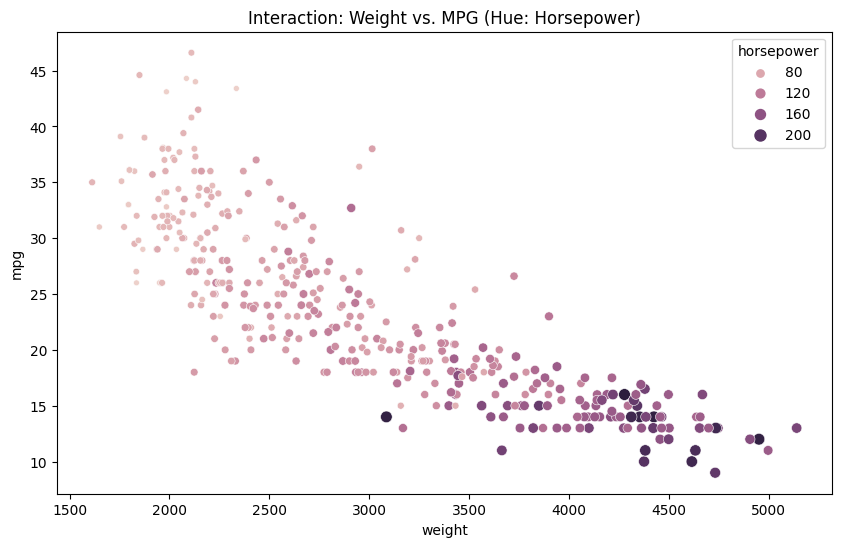

In [21]:
# Interaction Effects
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', hue='horsepower', size='horsepower', data=df)
plt.title('Interaction: Weight vs. MPG (Hue: Horsepower)')
plt.show()

# Predictive Modeling# 

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [23]:
# Feature Engineering (creating new features)
df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']
df['power_to_weight'] = df['horsepower'] / df['weight']

In [24]:
# Features and target variable
X = df.drop('mpg', axis=1)
y = df['mpg']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


## Model selection

In [25]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42)
}

In [26]:
# Store results for plotting
results = []

# Train and evaluate each model
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate on the test set
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'CV RMSE': cv_rmse.mean(),
        'Test RMSE': rmse,
        'Test R²': r2
    })
    
    print(f'{name} - Cross-validated RMSE: {cv_rmse.mean()}')
    print(f'{name} - Test RMSE: {rmse}, Test R²: {r2}')

Linear Regression - Cross-validated RMSE: 3.1324304882291227
Linear Regression - Test RMSE: 3.045119562779347, Test R²: 0.81832587789908
Ridge - Cross-validated RMSE: 3.1005004674986467
Ridge - Test RMSE: 3.060557503725486, Test R²: 0.8164791301543309
Lasso - Cross-validated RMSE: 3.4603627697834414
Lasso - Test RMSE: 3.2950799854643593, Test R²: 0.7872760963646772
ElasticNet - Cross-validated RMSE: 3.4449854112897
ElasticNet - Test RMSE: 3.305719797030619, Test R²: 0.7859001076628571


In [27]:
# Function to plot learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    plt.grid()

    plt.plot(train_sizes, np.mean(train_rmse, axis=1), 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, np.mean(test_rmse, axis=1), 'o-', color="g", label="Cross-validation RMSE")

    plt.legend(loc="best")
    return plt

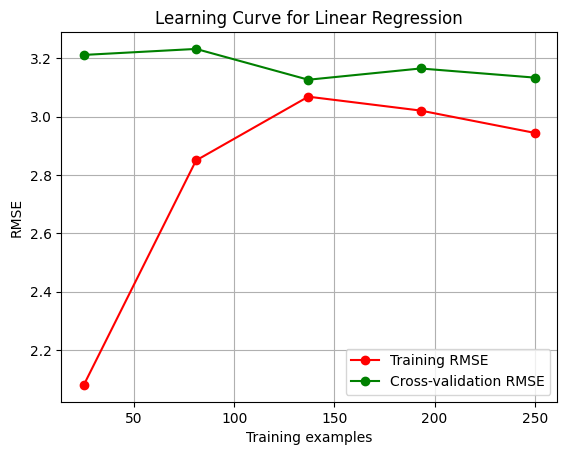

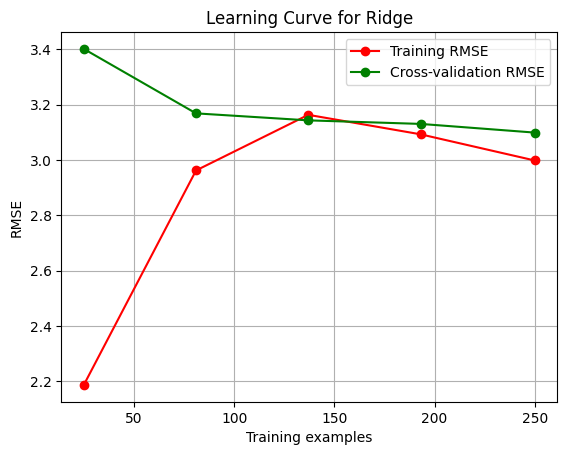

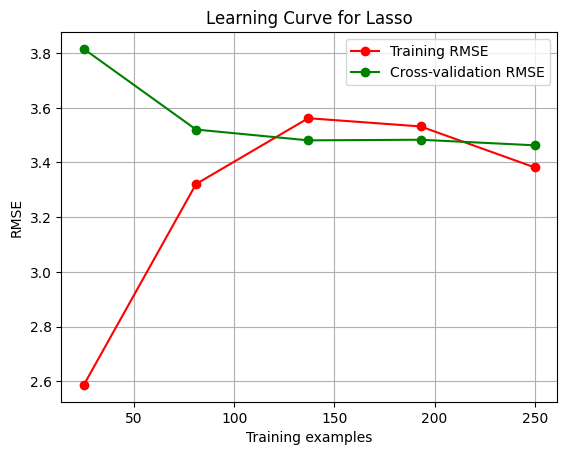

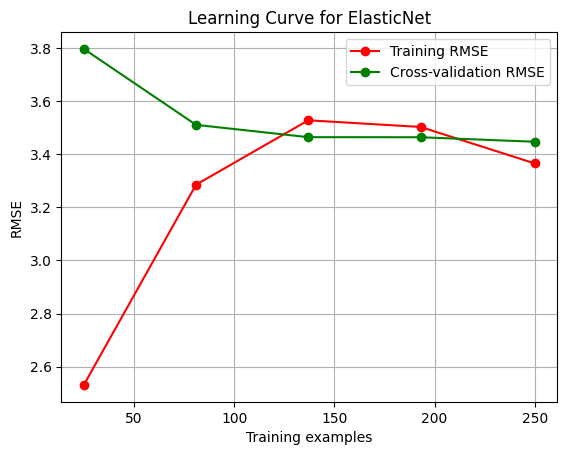

In [28]:
# Plot learning curves for each model
for name, model in models.items():
    plot_learning_curve(model, X_train, y_train, f'Learning Curve for {name}')
    plt.show()

In [29]:
# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results)

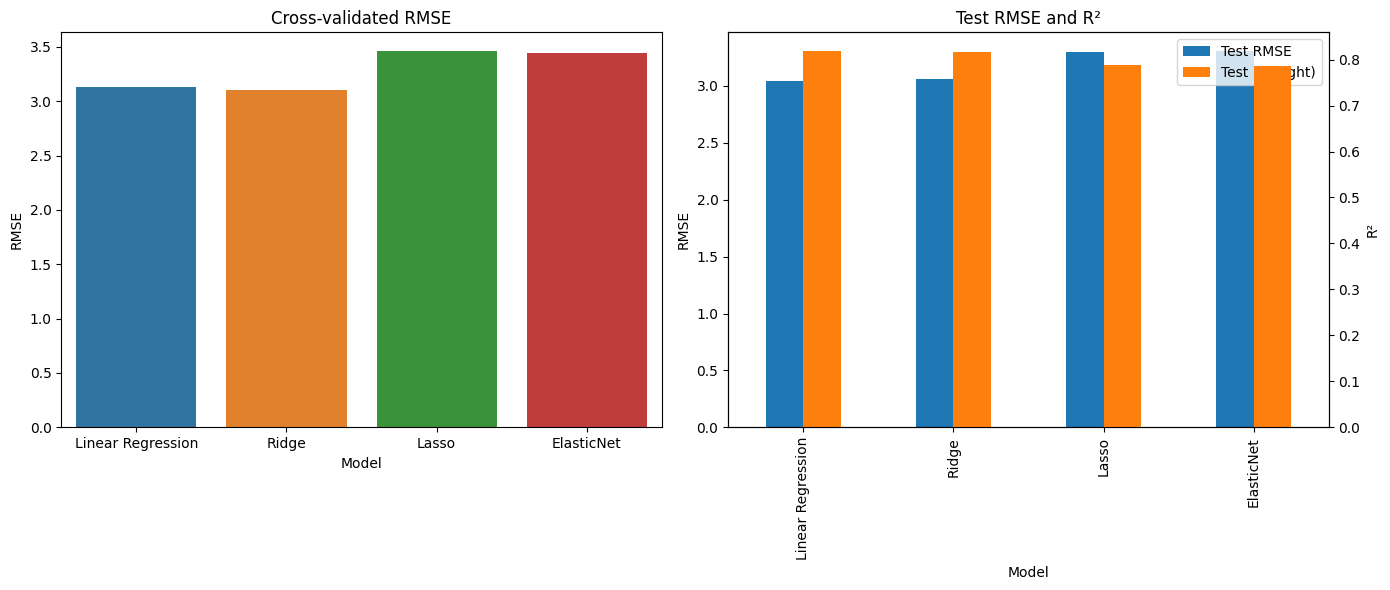

In [30]:
# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cross-validated RMSE
sns.barplot(x='Model', y='CV RMSE', data=results_df, ax=axes[0])
axes[0].set_title('Cross-validated RMSE')
axes[0].set_ylabel('RMSE')

# Test RMSE and R²
results_df.plot(x='Model', y=['Test RMSE', 'Test R²'], kind='bar', secondary_y='Test R²', ax=axes[1])
axes[1].set_title('Test RMSE and R²')
axes[1].set_ylabel('RMSE')
axes[1].right_ax.set_ylabel('R²')

plt.tight_layout()
plt.show()

###### Model Evaluation Results
We evaluated four regression models: Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression. The performance of each model was assessed using cross-validation and test metrics, including Root Mean Squared Error (RMSE) and R² (coefficient of determination).

1. Linear Regression
- Cross-validated RMSE: 3.13
The average RMSE obtained from 5-fold cross-validation, indicating how well the model performs on unseen data during training.
- Test RMSE: 3.05
The RMSE on the test set, showing the model's performance on data not seen during training.
- Test R²: 0.82
The R² score on the test set, indicating that approximately 82% of the variance in the target variable (mpg) is explained by the model.
2. Ridge Regression
- Cross-validated RMSE: 3.10
Similar to Linear Regression, this is the RMSE from cross-validation, demonstrating the model's stability during training.
- Test RMSE: 3.06
The RMSE on the test set, which is slightly higher than that of the Linear Regression model.
- Test R²: 0.82
The R² score is slightly lower than that of Linear Regression but still indicates a high level of explained variance.
3. Lasso Regression
- Cross-validated RMSE: 3.46
The RMSE from cross-validation is higher compared to Linear and Ridge Regression, suggesting that Lasso may be underfitting or struggling with feature selection.
- Test RMSE: 3.30
The test RMSE is also higher, indicating that Lasso Regression may not perform as well as the other models on unseen data.
- Test R²: 0.79
The R² score is the lowest among the models, reflecting that Lasso Regression explains less of the variance in the target variable.
4. ElasticNet Regression
- Cross-validated RMSE: 3.44
The cross-validated RMSE is comparable to Lasso but slightly lower, suggesting that ElasticNet may handle feature selection better than Lasso.
- Test RMSE: 3.31
The test RMSE is similar to Lasso, indicating similar performance on unseen data.
- Test R²: 0.79
The R² score is slightly lower than that of Ridge and Linear Regression, showing that ElasticNet explains less variance compared to those models.

# Summary
- Linear Regression and Ridge Regression performed the best overall, with the lowest RMSE and highest R² scores.
- Lasso Regression and ElasticNet Regression had higher RMSE and lower R² scores, suggesting they may not generalize as well as Linear or Ridge Regression in this case.
- Linear Regression provided the best balance between simplicity and performance, making it the most suitable model for predicting mpg based on the current dataset.